In [2]:
from globalConstants import *
import dynamiqs as dq
import jax
import jax.numpy as jnp # the JAX version of numpy
from matplotlib import pyplot as plt


In [3]:
Hbuff = g2 * dq.dag(a) @ dq.dag(a) @ b  + jnp.conj(g2) * a @ a @ dq.dag(b) + jnp.conj(eps) * b + eps * dq.dag(b)
jump_ops = [jnp.sqrt(Kb)*b] # jump operators
exp_ops = [dq.dag(a) @ a] # expectation operators
res = dq.mesolve(Hbuff,jump_ops, psi0, t_save, exp_ops=exp_ops) # solve the master equation
# Simulating 1.1

|██████████| 100.0% ◆ elapsed 426.58ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 381.41ms ◆ remaining 0.00ms  


==== MESolveResult ====
Solver : Tsit5
Infos  : 156 steps (128 accepted, 28 rejected)
States : QArray complex64 (1000, 100, 100) | 76.3 Mb


100%|██████████| 50/50 [00:02<00:00, 21.44it/s]


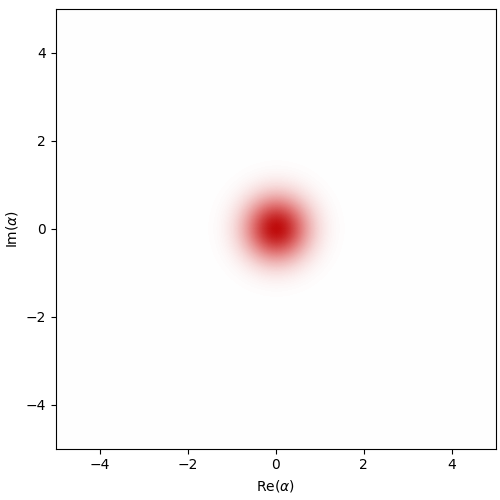

In [4]:
epsilon_z =1+1j
alpha = 100
H_zeno = epsilon_z.conjugate()*a_tensored@a_tensored+epsilon_z*adag_tensored@adag_tensored
jump_ops = [a_tensored- alpha*dq.tensor(dq.eye(na), dq.eye(nb))]
jump_ops= [jnp.sqrt(Kb)*b]
H_zeno+=Hbuff
H_zeno = g2 * dq.dag(a) @ dq.dag(a) @ b  + jnp.conj(g2) * a @ a @ dq.dag(b) + jnp.conj(eps) * b + eps * dq.dag(b)# Hamiltonian
result = dq.mesolve(H_zeno, jump_ops,psi0, t_save)
print(result)

trace_a = dq.ptrace(res.states, 0,res.states.dims) # trace of a

dq.plot.wigner_gif(trace_a)

|██████████| 100.0% ◆ elapsed 320.21ms ◆ remaining 0.00ms  
/Users/amer_/Documents/Obsidian Vault/Personal/Project Notes/Hackathon/iQuHack/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/amer_/Documents/Obsidian Vault/Personal/Project Notes/Hackathon/iQuHack/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


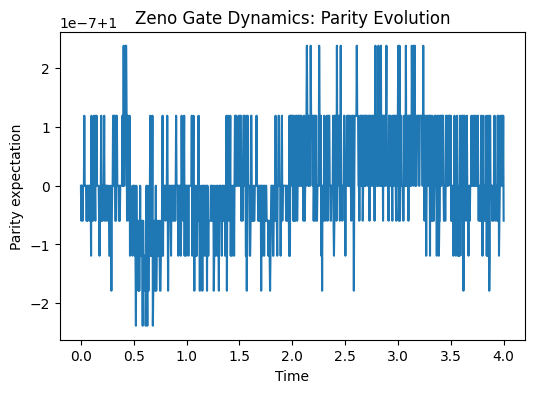

In [5]:
# Define the parity operator for mode a (in the tensor space)
parity_a = dq.tensor(dq.parity(na), dq.eye(nb))

# Run the simulation
result = dq.mesolve(H_zeno, jump_ops, psi0, t_save)

# Extract parity values
parity_vals = [dq.expect(parity_a, state) for state in result.states]

# Plot parity versus time
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(t_save, parity_vals)
plt.xlabel('Time')
plt.ylabel('Parity expectation')
plt.title('Zeno Gate Dynamics: Parity Evolution')
plt.show()
